Основные KPI

In [ ]:
Популярность:
Количество активных пользователей(сайт, приложение)
Количество заказов(сайт, приложение)
Количество брошенных заказов(сайт, приложение)
Частота покупок клиентов

Качество сервиса:
Средняя скорость доставки
Средняя скорость обработки заказа
Доставляемость заказов
Общая оценка удовлетворенности сервисом

Финансовые показатели:
Средний чек
Средние затраты на доставку 

Программы лояльности и промокоды:
Наиболее популярные товары
Наиболее популярные магазины

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
orders = pd.read_csv('orders.delivery_windows.stores.adreses.csv')
cancel = pd.read_csv('cancellations.csv')
repl = pd.read_csv('replacements.csv')
orders.head()

,id,created_at,delivery_window_id,item_total,promo_total,cost,total_cost,ship_address_id,shipped_at,state,...,id.1,starts_at,ends_at,store_id.1,id.2,city,retailer_id,id.3,lat,lon
0,762121.0,2018-08-28 15:30:09.000,229117.0,1120.0,-323.99,0.0,0.0,897838.0,2018-08-29 16:02:12.000,shipped,...,229117.0,2018-08-29 12:00:00.000,2018-08-29 14:00:00.000,1.0,1.0,1.0,1.0,897838.0,55.893712,37.618231
1,767721.0,2018-08-31 13:19:52.000,232421.0,7124.0,0.00,646.0,646.0,864605.0,2018-09-02 07:47:43.000,shipped,...,232421.0,2018-09-02 06:00:00.000,2018-09-02 08:00:00.000,1.0,1.0,1.0,1.0,864605.0,55.872829,37.607350
2,771433.0,2018-09-02 14:20:02.000,233250.0,2558.0,0.00,299.0,299.0,913855.0,2018-09-03 07:05:44.000,shipped,...,233250.0,2018-09-03 06:00:00.000,2018-09-03 08:00:00.000,1.0,1.0,1.0,1.0,913855.0,55.814756,37.640523
3,773580.0,2018-09-03 20:14:34.000,234091.0,2917.0,0.00,0.0,0.0,917150.0,2018-09-04 20:53:00.000,shipped,...,234091.0,2018-09-04 20:00:00.000,2018-09-04 22:00:00.000,1.0,1.0,1.0,1.0,917150.0,55.861626,37.671353
4,774683.0,2018-09-04 14:44:35.000,234920.0,3819.0,0.00,0.0,0.0,918798.0,2018-09-06 03:45:03.000,shipped,...,234920.0,2018-09-05 20:00:00.000,2018-09-05 22:00:00.000,1.0,1.0,1.0,1.0,918798.0,55.866321,37.654527


In [3]:
#количество уникальных пользователей:
len(orders['user_id'].unique())

257828

In [4]:
#Средний чек
int(orders.item_total.mean())

4921

In [5]:
#количество активных пользователей(больше двух заказов)
ort = orders[['id', 'user_id']]
ort.user_id.value_counts().loc[lambda x : x > 2]

56017.0      493
129033.0     427
25097.0      422
215536.0     405
304851.0     279
            ... 
998240.0       3
165112.0       3
218410.0       3
678353.0       3
1689051.0      3
Name: user_id, Length: 69931, dtype: int64

In [6]:
print(int(6993100/257827), '%')


27 %


In [7]:
#Доставляемость 
orders.state.value_counts()
        #доставленных 729963
dost = 72996300 / orders.id.count()
print(int(dost), '%') 
        


99 %


In [8]:
#Среднее время доставки
orders['created_at'] = pd.to_datetime(orders['created_at'])
orders['shipped_at'] = pd.to_datetime(orders['shipped_at'])
ordertime = orders['shipped_at'] - orders['created_at']
ordertime.median()

Timedelta('1 days 01:21:44')

In [9]:
#Среднее время обработки заказа
orders['starts_at'] = pd.to_datetime(orders['starts_at'])
orderpreptime = orders['starts_at'] - orders['created_at']
orderpreptime.median()

Timedelta('0 days 23:52:40')

In [10]:
# средние затраты на доставку
int(orders.total_cost.mean())

171

In [11]:
#Самые популярные магазины
orders[['id', 'retailer_id']].groupby('retailer_id').count()

,id
retailer_id,
1.0,624115
8.0,56159
15.0,47372
16.0,2347


Поиск точек роста

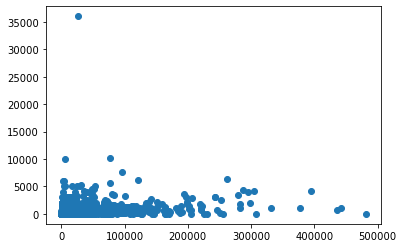

In [12]:
#Соотношение цены заказа к количеству покупок(программа скидок от  определенного количества покупок)
plt.scatter(orders['item_total'], orders['total_quantity'])

In [21]:
#Самые популярные ретейлеры в разных городах(привлечение новых или увеличение доли "отстающих")
orders[['city', 'retailer_id', 'id']].groupby(['city', 'retailer_id']).count()


id
city retailer_id        
1.0  1.0          440910
     8.0            1273
     15.0          38049
     16.0           2347
2.0  1.0           29618
     8.0            5345
     15.0           5703
5.0  1.0           21673
     8.0            7260
     15.0           1040
7.0  1.0           58998
     8.0           18262
     15.0           1213
8.0  1.0           19884
     8.0            9524
10.0 1.0           38257
     8.0            8626
     15.0            863
13.0 1.0           14775
     8.0            5869
     15.0            504

In [28]:
#При сборе корзины, сразу предлагать замену самых заменяемых и отменяемых товаров
cancel.item_id.value_counts()

14601325    7
11974938    7
12443984    7
13430960    7
12995013    7
           ..
75602521    1
13517664    1
10765242    1
80632675    1
20973569    1
Name: item_id, Length: 1291843, dtype: int64

In [29]:
repl.item_id.value_counts()

14703521    7
12986716    7
14703527    7
27022607    6
26670710    6
           ..
52698667    1
86668731    1
23334441    1
23332392    1
20971520    1
Name: item_id, Length: 1166251, dtype: int64

In [50]:
#Кол-во заказов с платной доставкой(при платной доставке, скидка на следующую покупку/доставку при чеке от ... )
print(int((orders.total_cost[orders.total_cost != 0].count())*100/orders.shape[0]), '%')


79 %


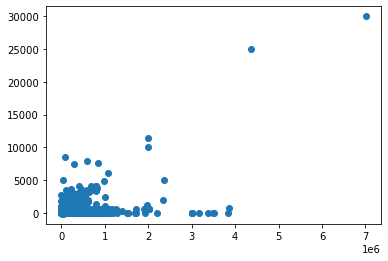

In [51]:
#Цена на заказы в зависимости от веса(система ценообразования доставки в зависимости от веса/количества товаров)
plt.scatter(orders['total_weight'], orders['total_cost'])

#Всплывающие окна в приложении/на сайте со скидочными товарами партнеров